<a href="https://colab.research.google.com/github/eliasbaumann/UnfairGAN/blob/master/Data_prep_UnfairGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# you can find all datasets at: http://fairness-measures.org/Pages/Datasets

raw_compas = pd.read_csv("https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv")
#raw_compas_2 = pd.read_csv("https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores.csv")
raw_sqf = pd.read_csv("https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/stop-question-frisk/sqf-2017.csv")
raw_schufa = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=' ',header=None)
#raw_chile = pd.read_csv("https://raw.githubusercontent.com/MilkaLichtblau/BA_Simon/master/Simons_Arbeit/Chile/ADMISION2017_Refractored_replaced.csv",sep=";")

In [17]:
raw_sqf.iloc[:,35:45]

,OTHER_CONTRABAND_FLAG,FIREARM_FLAG,KNIFE_CUTTER_FLAG,OTHER_WEAPON_FLAG,WEAPON_FOUND_FLAG,PHYSICAL_FORCE_CEW_FLAG,PHYSICAL_FORCE_DRAW_POINT_FIREARM_FLAG,PHYSICAL_FORCE_HANDCUFF_SUSPECT_FLAG,PHYSICAL_FORCE_OC_SPRAY_USED_FLAG,PHYSICAL_FORCE_OTHER_FLAG
0,N,(null),(null),(null),N,(null),(null),(null),(null),(null)
1,N,(null),(null),(null),N,(null),(null),(null),(null),(null)
2,N,(null),(null),(null),N,(null),(null),(null),(null),(null)
3,N,(null),(null),(null),N,(null),(null),Y,(null),(null)
4,N,(null),(null),(null),N,(null),(null),Y,(null),(null)
5,N,(null),(null),(null),N,(null),(null),(null),(null),(null)
6,N,(null),(null),(null),N,(null),(null),Y,(null),(null)
7,N,(null),(null),(null),N,(null),(null),(null),(null),(null)
8,N,(null),(null),(null),N,(null),(null),Y,(null),(null)
9,Y,(null),(null),(null),N,(null),(null),(null),(null),(null)


In [18]:
raw_sqf.columns

Index([u'STOP_FRISK_ID', u'STOP_FRISK_DATE', u'STOP_FRISK_TIME', u'YEAR2',
       u'MONTH2', u'DAY2', u'STOP_WAS_INITIATED', u'SPRINT_NUMBER',
       u'RECORD_STATUS_CODE', u'ISSUING_OFFICER_RANK',
       u'ISSUING_OFFICER_COMMAND_CODE', u'SUPERVISING_OFFICER_RANK',
       u'SUPERVISING_OFFICER_COMMAND_CODE',
       u'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       u'LOCATION_IN_OUT_CODE', u'JURISDICTION_CODE',
       u'JURISDICTION_DESCRIPTION', u'OBSERVED_DURATION_MINUTES',
       u'SUSPECTED_CRIME_DESCRIPTION', u'STOP_DURATION_MINUTES',
       u'OFFICER_EXPLAINED_STOP_FLAG',
       u'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', u'OTHER_PERSON_STOPPED_FLAG',
       u'SUSPECT_ARRESTED_FLAG', u'SUSPECT_ARREST_NUMBER',
       u'SUSPECT_ARREST_OFFENSE', u'SUMMONS_ISSUED_FLAG', u'SUMMONS_NUMBER',
       u'SUMMONS_OFFENSE_DESCRIPTION', u'OFFICER_IN_UNIFORM_FLAG',
       u'ID_CARD_IDENTIFIES_OFFICER_FLAG', u'SHIELD_IDENTIFIES_OFFICER_FLAG',
       u'VERBAL_IDENTIFIES_OFFIC

In [8]:

#sqf = raw_sqf.drop(['STOP_FRISK_ID','STOP_FRISK_DATE','YEAR2','SPRINT_NUMBER','RECORD_STATUS_CODE','ISSUING_OFFICER_COMMAND_CODE','SUPERVISING_OFFICER_COMMAND_CODE','JURISDICTION_DESCRIPTION','OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION','SUSPECT_ARREST_NUMBER','SUMMONS_NUMBER'],axis=1)

ValueError: ignored

In [0]:
#########################
# Compas prep:
# Used: https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb
# as base for what is important in that dataset as they do investigation into unfairness

cmp = raw_compas[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count', 'days_b_screening_arrest', 'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out']]
cmp = cmp.query('days_b_screening_arrest <= 30 and days_b_screening_arrest >= -30 and is_recid != -1 and c_charge_degree != "O" and score_text != "N/A"')
cmp = cmp.reset_index(drop=True)

# editing such that this will work for gan
# age_cat and score_text can be derived from other variables and are therefore removed
tmp = pd.Series(delta.total_seconds()/3600 for delta in (pd.to_datetime(cmp.c_jail_out)-pd.to_datetime(cmp.c_jail_in)))
cmp['length_of_stay'] = tmp
cmp = cmp.drop(['c_jail_out','c_jail_in','age_cat','score_text'],axis=1)


# Prepare categorical columns
cat_cols = ['c_charge_degree','race','sex','is_recid','two_year_recid']

def generate_gen_out_vec(df,cat_cols):
  x = np.repeat(1,len(df.columns)-len(cat_cols))
  x = np.concatenate((x,(np.max(df[cat_cols].apply(lambda x: x.astype('category')).apply(lambda x: x.cat.codes))+1)))
  return x


# Generate vector for number of outputs for softmax
n_outputs = generate_gen_out_vec(cmp,cat_cols)

# Create dummy variables
cmp_dum = pd.get_dummies(data=cmp, columns = cat_cols)

# Rescale numeric columns
num_cols = len(cmp.columns)-len(cat_cols)
cmp_dum.iloc[:,:num_cols] = cmp_dum.iloc[:,:num_cols].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

cmp_dum = cmp_dum.astype('float32')



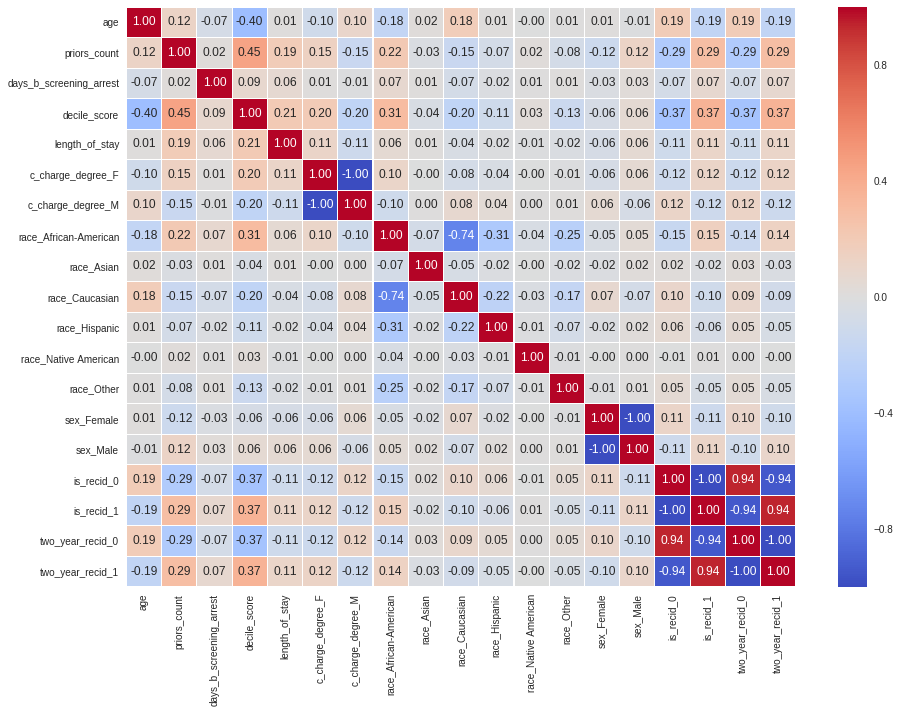

In [0]:

def generate_heatmap(data):
#     for column in data:
#         if (data[column].min()==data[column].max()):
#             data[column][1]=data[column][1]+1
    f, ax = plt.subplots(figsize=(15, 10)) #15,10
    hm = sns.heatmap(data.corr(), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
    f.subplots_adjust(top=0.93)
    
generate_heatmap(cmp_dum)

In [0]:
cmp_dum_prepped = cmp_dum.drop(['c_charge_degree_F','race_Caucasian','sex_Male','is_recid_0','two_year_recid_0'],axis=1)
X_train = cmp_dum_prepped.drop(['decile_score'],axis=1)
Y_train = cmp_dum_prepped['decile_score']

In [0]:
# linear model to demonstrate unfairness?
from sklearn import linear_model

def simpleLM(X_train,Y_train):
  regr = linear_model.LinearRegression()
  regr.fit(X_train,Y_train)
  res = pd.DataFrame(regr.coef_,X_train.columns)  
  return res

simpleLM(X_train,Y_train)




,0
age,-0.097052
priors_count,0.239299
days_b_screening_arrest,0.014349
length_of_stay,0.000271
c_charge_degree_M,-0.370544
race_African-American,0.499289
race_Asian,-0.481260
race_Hispanic,-0.418571
race_Native American,1.655720
race_Other,-0.852315
